In [24]:
import cv2
from cv2 import dnn
import numpy as np

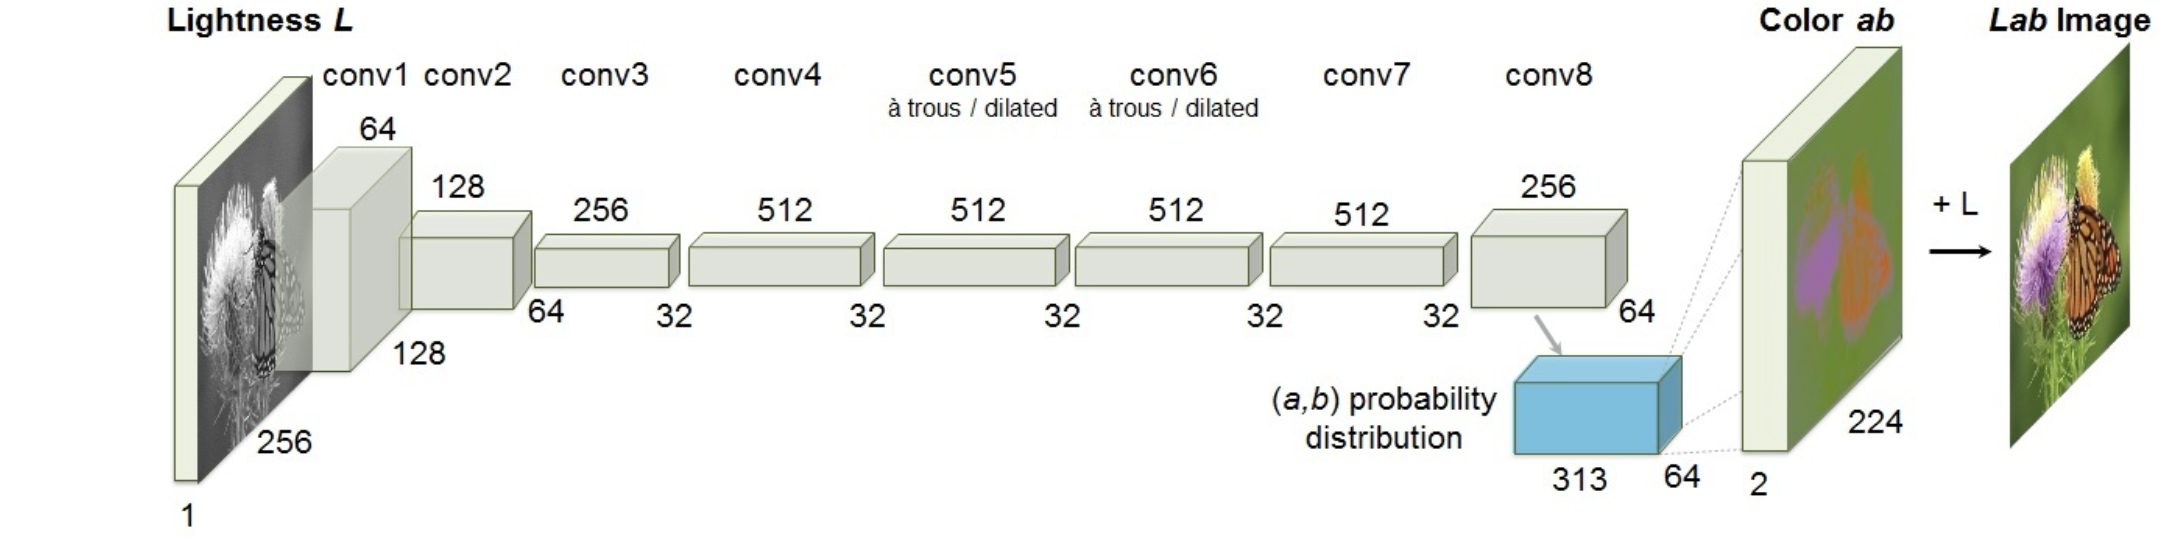

get model from here https://github.com/AbhilipsaJena/Image_colorization-OpenCV (msti donlod satu2)

# Code dri GeeksforGeeks

url https://www.geeksforgeeks.org/computer-vision/black-and-white-image-colorization-with-opencv-and-deep-learning/

In [25]:
proto_file = 'Model\colorization_deploy_v2.prototxt'
model_file = 'Model\colorization_release_v2.caffemodel'
hull_pts = 'Model\pts_in_hull.npy'
img_path = 'dataset/data/train_black/image0002.jpg'

In [26]:
net = dnn.readNetFromCaffe(proto_file,model_file)
kernel = np.load(hull_pts)

In [27]:
img = cv2.imread(img_path)
scaled = img.astype("float32") / 255.0
lab_img = cv2.cvtColor(scaled, cv2.COLOR_BGR2LAB)

In [28]:
class8 = net.getLayerId("class8_ab")
conv8 = net.getLayerId("conv8_313_rh")
pts = kernel.transpose().reshape(2, 313, 1, 1)
net.getLayer(class8).blobs = [pts.astype("float32")]
net.getLayer(conv8).blobs = [np.full([1, 313], 2.606, dtype="float32")]

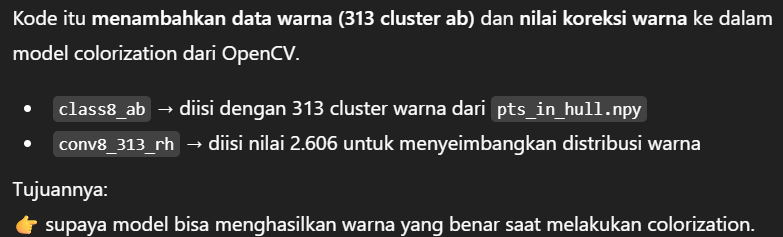

In [29]:
resized = cv2.resize(lab_img, (224, 224))
L = cv2.split(resized)[0]
L -= 50

Gambar diubah ukuran, channel L diambil, lalu dinormalisasi sebelum masuk model.

In [30]:
net.setInput(cv2.dnn.blobFromImage(L))
ab_channel = net.forward()[0, :, :, :].transpose((1, 2, 0))
ab_channel = cv2.resize(ab_channel, (img.shape[1], img.shape[0]))

Model menebak warna a,b, lalu hasilnya disesuaikan ukuran gambar asli.

In [31]:
L = cv2.split(lab_img)[0]
colorized = np.concatenate((L[:, :, np.newaxis], ab_channel), axis=2)

Ini membuat gambar LAB baru dengan L asli + warna hasil prediksi.

In [32]:
colorized = cv2.cvtColor(colorized, cv2.COLOR_LAB2BGR)
colorized = np.clip(colorized, 0, 1)
colorized = (255 * colorized).astype("uint8")

Ini mengubah gambar LAB berwarna jadi gambar BGR biasa yang siap ditampilkan.

In [33]:
img = cv2.resize(img,(640,640))
colorized = cv2.resize(colorized,(640,640))
result = cv2.hconcat([img,colorized])

cv2.imshow("Grayscale -> Colour", result)
cv2.waitKey(0)

-1

result: 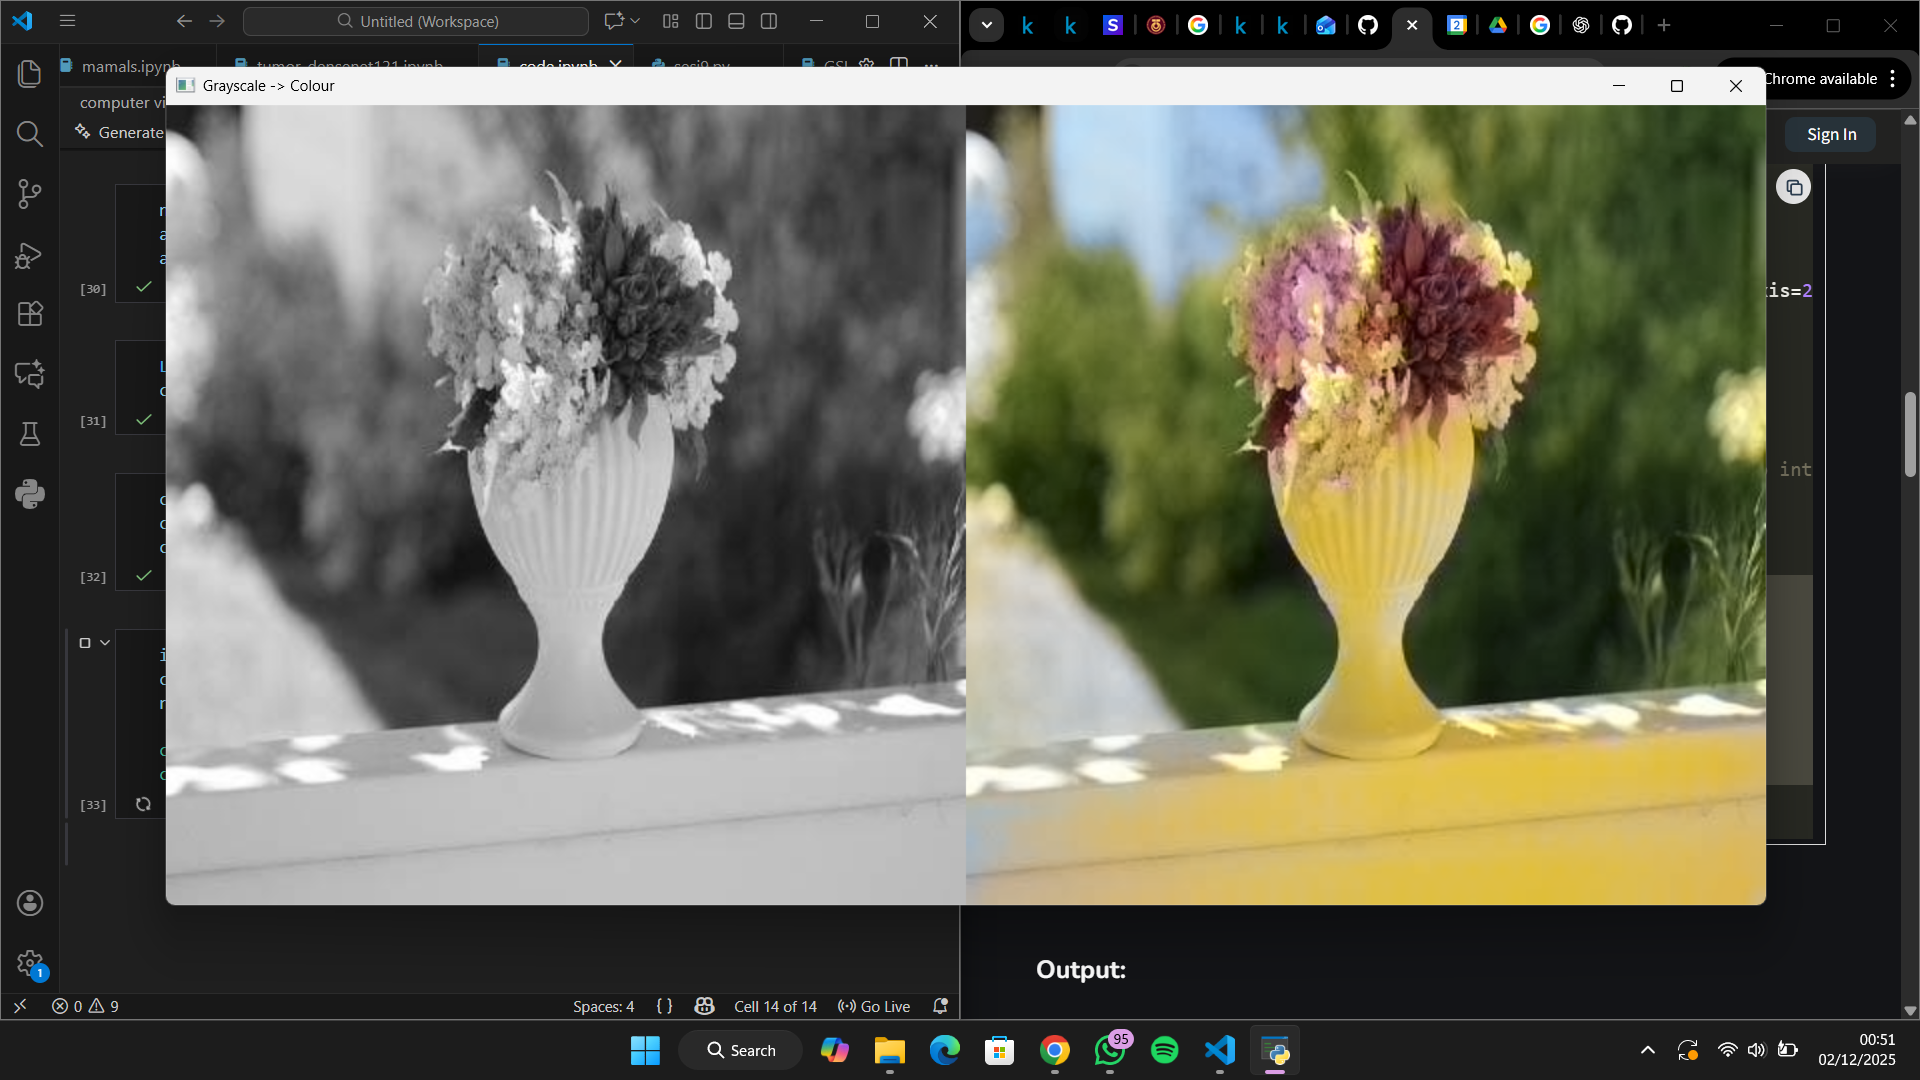

harusnya: 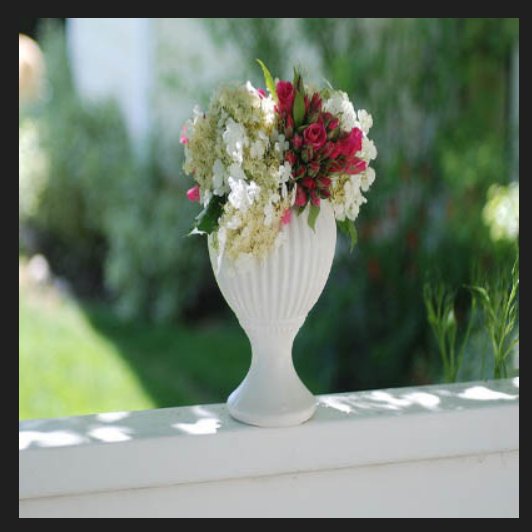